<a href="https://colab.research.google.com/github/araghuwanshi19/titanic_exploration/blob/main/titanic_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Preparation

In [1]:
# import libraries and packages
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
from google.colab import files
files.upload()

Saving train.csv to train.csv


{'train.csv': b'PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked\r\n1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,,S\r\n2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C\r\n3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,,S\r\n4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S\r\n5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,,S\r\n6,0,3,"Moran, Mr. James",male,,0,0,330877,8.4583,,Q\r\n7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S\r\n8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.075,,S\r\n9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,,S\r\n10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,,C\r\n11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4,1,1,PP 9549,16.7,G6,S\r\n12,1,1,"Bonnell, Miss. Elizabeth",female,58,0,0,113783,26.55,C103,S\r\

In [3]:
# load file data
df = pd.read_csv('train.csv') 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

##Correlation - Survival and Cabin

In [6]:
df['Cabin'] = df['Cabin'].fillna('U')

In [7]:
df['Cabin'] = df['Cabin'].astype(str).str[0]

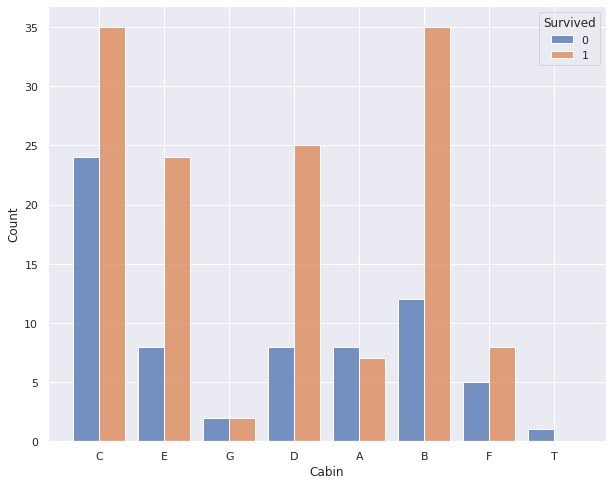

In [8]:
sns.set(rc = {'figure.figsize':(10,8)})
sns.histplot(x='Cabin', hue='Survived', data=df[-(df.Cabin == 'U')], stat="count", multiple="dodge", shrink=0.8)

##Correlation - Survival and Name

In [9]:
# extraxt title from names
df['Title'] = df['Name'].apply(lambda name: name.split(',')[1].split('.')[0].strip())
df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [10]:
# normalize titles
normalized_titles = {
    'Mr' : 'Mr',
    'Mrs': 'Mrs',
    'Miss' : 'Miss',
    'Master' : 'Royalty',
    'Don' : 'Royalty',
    'Rev' : 'Royalty',
    'Dr' : 'Dr',
    'Mme' : 'Mrs',
    'Ms' : 'Miss',
    'Major' : 'Major',
    'Lady' : 'Royalty',
    'Sir' : 'Royalty',
    'Mlle' : 'Miss',
    'Col' : 'Col',
    'Capt' : 'Capt',
    'the Countess' : 'Royalty',
    'Jonkheer' : 'Royalty'
}


In [11]:
df['Title'] = df['Title'].map(normalized_titles)

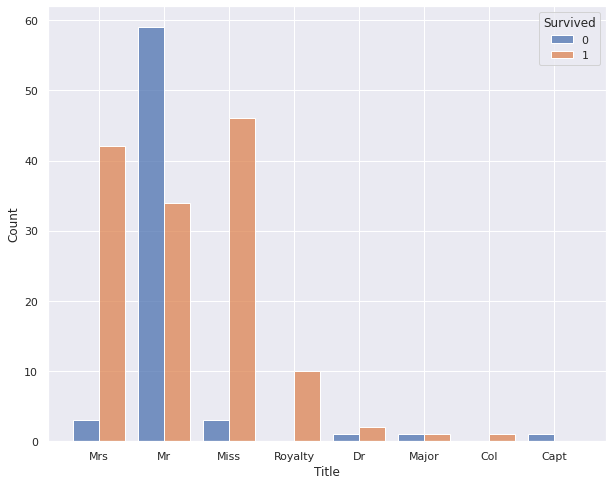

In [12]:
sns.set(rc = {'figure.figsize':(10,8)})
sns.histplot(x='Title', hue='Survived', data=df[-(df.Cabin == 'U')], stat="count", multiple="dodge", shrink=0.8)

In [13]:
grouped = df.groupby(['Sex','Pclass', 'Title'])  
grouped.Age.median()

Sex     Pclass  Title  
female  1       Dr         49.0
                Miss       30.0
                Mrs        40.0
                Royalty    40.5
        2       Miss       24.0
                Mrs        32.0
        3       Miss       18.0
                Mrs        31.0
male    1       Capt       70.0
                Col        58.0
                Dr         44.0
                Major      48.5
                Mr         40.0
                Royalty    24.5
        2       Dr         38.5
                Mr         31.0
                Royalty     3.0
        3       Mr         26.0
                Royalty     4.0
Name: Age, dtype: float64

##Drop unwanted columns

In [14]:
cols = ['Name', 'Ticket']
df = df.drop(cols, axis=1)

##Fill in missing values

In [15]:
most_embarked = df['Embarked'].value_counts().index[0]

df['Embarked'] = df['Embarked'].fillna(most_embarked)

In [16]:
df['Age'] = grouped.Age.apply(lambda x: x.fillna(x.median()))

##Create dummies for features

In [17]:
cols = ['Title', 'Pclass', 'Sex', 'Cabin', 'Embarked']
for col in cols:
      df = pd.get_dummies(df, columns=[col])

##Converting pandas dataframe into numpy array

In [18]:
# assign input and output attributes 
X = df.values
y = df['Survived'].values

In [19]:
# remove "Survived" column from X
X = np.delete(X, 1, axis=1)

##Splitting dataset ino training data and testing data

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#Data Exploration

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    891 non-null    int64  
 1   Survived       891 non-null    int64  
 2   Age            891 non-null    float64
 3   SibSp          891 non-null    int64  
 4   Parch          891 non-null    int64  
 5   Fare           891 non-null    float64
 6   Title_Capt     891 non-null    uint8  
 7   Title_Col      891 non-null    uint8  
 8   Title_Dr       891 non-null    uint8  
 9   Title_Major    891 non-null    uint8  
 10  Title_Miss     891 non-null    uint8  
 11  Title_Mr       891 non-null    uint8  
 12  Title_Mrs      891 non-null    uint8  
 13  Title_Royalty  891 non-null    uint8  
 14  Pclass_1       891 non-null    uint8  
 15  Pclass_2       891 non-null    uint8  
 16  Pclass_3       891 non-null    uint8  
 17  Sex_female     891 non-null    uint8  
 18  Sex_male  

In [22]:
df.describe()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Title_Capt,Title_Col,Title_Dr,Title_Major,...,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Embarked_C,Embarked_Q,Embarked_S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,...,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,29.130382,0.523008,0.381594,32.204208,0.001122,0.002245,0.007856,0.002245,...,0.066218,0.037037,0.035915,0.014590,0.004489,0.001122,0.771044,0.188552,0.086420,0.725028
std,257.353842,0.486592,13.484467,1.102743,0.806057,49.693429,0.033501,0.047351,0.088337,0.047351,...,0.248802,0.188959,0.186182,0.119973,0.066890,0.033501,0.420397,0.391372,0.281141,0.446751
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,21.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,446.000000,0.000000,26.000000,0.000000,0.000000,14.454200,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,668.500000,1.000000,36.750000,1.000000,0.000000,31.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,891.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
df.corr()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Title_Capt,Title_Col,Title_Dr,Title_Major,...,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Embarked_C,Embarked_Q,Embarked_S
PassengerId,1.000000,-0.005007,0.042302,-0.057527,-0.001652,0.012658,0.039097,0.041584,0.034547,0.008759,...,-0.040957,0.022828,0.042351,-0.035772,-0.060049,-0.013814,-0.019919,-0.001205,-0.033606,0.022204
Survived,-0.005007,1.000000,-0.062490,-0.035322,0.081629,0.257307,-0.026456,0.011329,0.008185,0.011329,...,0.114652,0.150716,0.145321,0.057935,0.016040,-0.026456,-0.316912,0.168240,0.003650,-0.149683
Age,0.042302,-0.062490,1.000000,-0.270763,-0.184461,0.121197,0.101652,0.101605,0.086863,0.068170,...,0.147937,0.144946,0.123222,-0.080006,-0.071655,0.039471,-0.276264,0.047481,-0.105376,0.024717
SibSp,-0.057527,-0.035322,-0.270763,1.000000,0.414838,0.159651,0.014507,-0.022508,0.003910,-0.022508,...,0.029251,-0.017575,-0.036865,0.001706,-0.001402,-0.015907,0.040460,-0.059528,-0.026354,0.068734
Parch,-0.001652,0.081629,-0.184461,0.414838,1.000000,0.216225,0.025731,-0.022467,-0.042150,-0.022467,...,0.030736,-0.019125,-0.016554,0.023694,0.072388,-0.015878,-0.036987,-0.011069,-0.081228,0.060814
Fare,0.012658,0.257307,0.121197,0.159651,0.216225,1.000000,0.026184,-0.001126,0.030395,-0.003514,...,0.364318,0.098878,0.053717,-0.033093,-0.025180,0.002224,-0.482075,0.269335,-0.117216,-0.162184
Title_Capt,0.039097,-0.026456,0.101652,0.014507,0.025731,0.026184,1.000000,-0.001590,-0.002983,-0.001590,...,-0.008926,-0.006574,-0.006470,-0.004079,-0.002251,-0.001124,-0.061513,-0.016158,-0.010310,0.020643
Title_Col,0.041584,0.011329,0.101605,-0.022508,-0.022467,-0.001126,-0.001590,1.000000,-0.004221,-0.002250,...,-0.012631,-0.009302,-0.009155,-0.005771,-0.003185,-0.001590,-0.030598,0.037766,-0.014588,-0.023904
Title_Dr,0.034547,0.008185,0.086863,0.003910,-0.042150,0.030395,-0.002983,-0.004221,1.000000,-0.004221,...,0.027426,0.049862,-0.017175,-0.010828,-0.005976,-0.002983,-0.042277,0.022104,0.017874,-0.030612
Title_Major,0.008759,0.011329,0.068170,-0.022508,-0.022467,-0.003514,-0.001590,-0.002250,-0.004221,1.000000,...,0.082742,-0.009302,-0.009155,-0.005771,-0.003185,-0.001590,-0.087042,-0.022864,-0.014588,0.029210


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fda0d91ee90>,
      dtype=object)

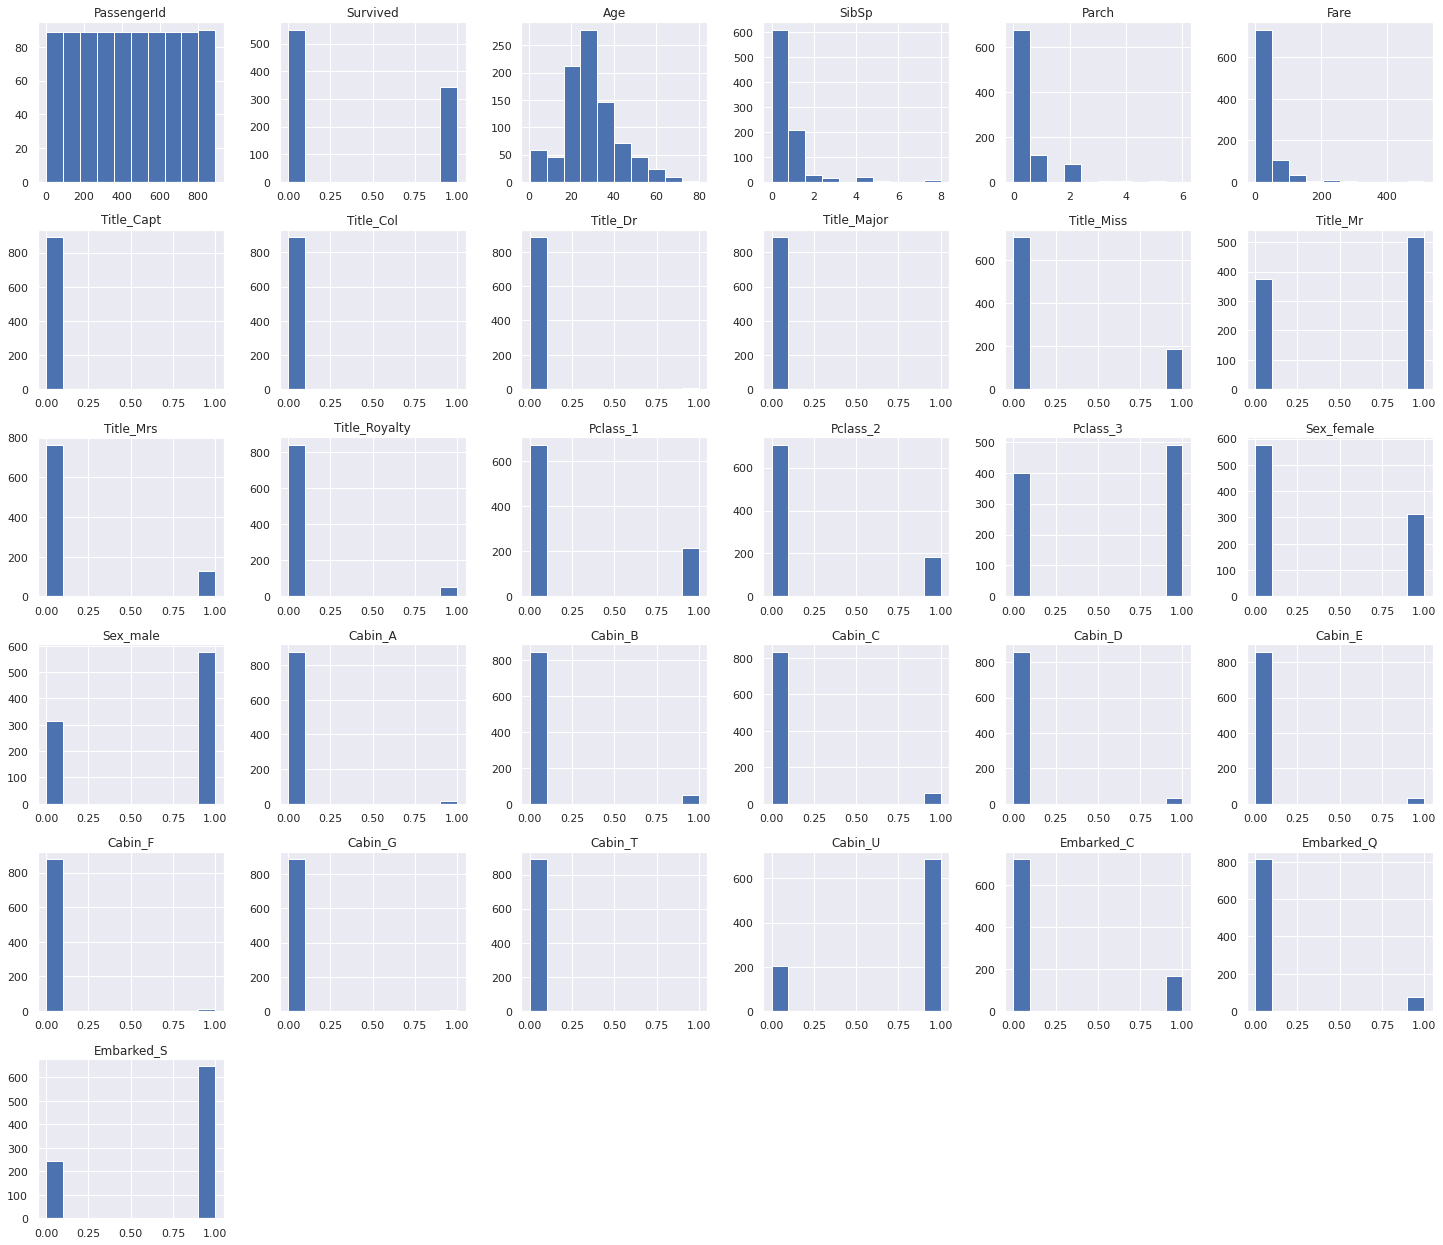

In [24]:
df.hist(figsize=(25,22))

##Modelling

In [25]:
from sklearn.linear_model  import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [26]:
log_reg = LogisticRegression(max_iter=2000)

log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

In [27]:
accuracy_score(y_pred, y_test)

0.8134328358208955

In [28]:
confusion_matrix(y_pred, y_test)

array([[143,  25],
       [ 25,  75]])